# Datasets and DataLoaders

In [1]:
print("Datasets and DataLoaders")

Datasets and DataLoaders


PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the Dataset to enable easy access to the samples.

Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training and 10000 test examples. Each image is a 28x28 grayscale image and has an assosciated label from one of 10 classes.

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [4]:
training_data = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=ToTensor()
)

### Iterating and Visualizing the Dataset


We can index Datasets manually like a list : `training_data[index]`.

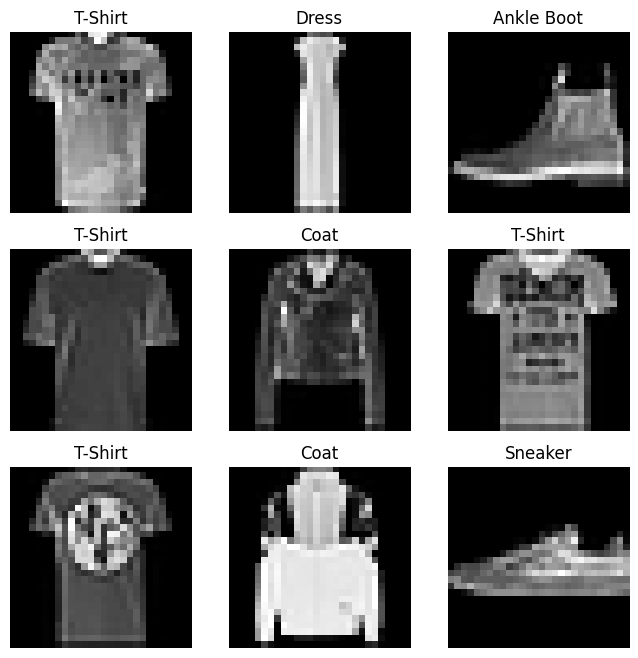

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()



## Creating a Custom Dataset for your Files

A custom dataset class must implement 3 functions:
- `__init__`
- `__len__`
- `__getitem__`

For FashionMNIST: 
- root_dir = img_dir, 
- labels are stored separately in a csv file (annotations_file)

In [7]:
import os
import pandas as pd
from torchvision.io import decode_image

In [8]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__():
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
        

#### `__init__`

- the __init__ function is run once when instantiating the Dataset object.


#### `__len__`

- returns the number of samples in our dataset

#### `__getitem__`

- loads and returns a sample from the dataset at the given index idx.
- based on the index :
    - it identifies the image's location on disk,
    - converts that to a tensor using decode_image,
    - retrieves the corresponding label from the csv data in `self.img_labels`
    - calls the transform functions on them (if applicable)
    - returns the tensor image and corresponding label in a tuple

## Preparing your data for training with DataLoaders

The `Dataset` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting and use Python's multiprocessing to speed up data retrieval.

`DataLoader` is a iterable that abstracts this complexity for us in an easy API.

In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through the DataLoader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


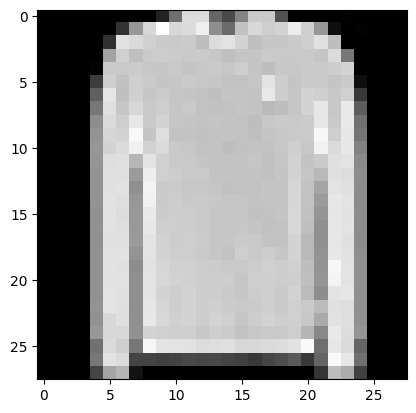

Label: 2


In [13]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()

print(f"Label: {label}")